## Kernel methods

Until now we focussed on methods that train a model on the available data and disregard it when doing classification. These include linear models such as LDA but also complex non-linear methods such a neural networks who learn the posterio probability. There are also other memory-based methods suchs as KNN classifiaction wheree you just assign the class which has the highest number of nearest neighbors. Here we focus on _kernel methods_. These are methods that learn a non-linear decision boundary for a classification problem by mapping the input to a nonlinear space using kernels. The basic definition of a kernel is 

$$
    k(x, x') = \phi(x)^T\phi(x')
$$

so when you have an example x you base the position of the input on the position of the other inputs. Taking the dot product between individual data points is called the _kernel trick_ 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

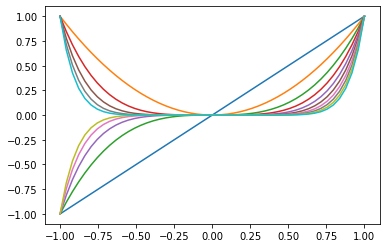

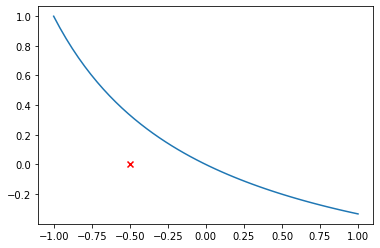

In [256]:
def create_polynomial(i):
    def _(x):
        return np.power(x, i)
    
    return _

def create_gaussian(i):
    def _(x):
        return np.exp(-(x - i)**2 / 0.1)
    
    return _

def create_sigmoid(i):
    def _(x):
        return (1 / (1 + np.exp(-15 * (x - i))))
    
    return _

def create_feature_vector(x, basisfunctions):
    fv = np.zeros(len(basisfunctions))
    
    for index, function in enumerate(basisfunctions):
        fv[index] = function(x)
        
    return fv.reshape(-1, 1)

basisfunctions = []

# Polynomials
for i in range(1, 11):
    basisfunctions.append(create_polynomial(i)) 

# Gaussians
# for i in np.linspace(-1, 1, 10):
#     basisfunctions.append(create_gaussian(i))
    
# Sigmoid
# for i in np.linspace(-1, 1, 10):
#     basisfunctions.append(create_sigmoid(i))

X = np.linspace(-1, 1)

feature_space = []
x_prime = -0.50
x_prime_vector = create_feature_vector(x_prime, basisfunctions)

for x in X:
    feature_space.append((create_feature_vector(x, basisfunctions).T @ x_prime_vector)[0])

plt.figure()
for function in basisfunctions:
    plt.plot(X, function(X))
plt.show()

plt.plot(X.flatten(), np.array(feature_space).flatten())
plt.scatter(x_prime, 0, marker='x', c='r')

## Example regression

Regressing on the sinus wave using kernels on gaussian basis functions

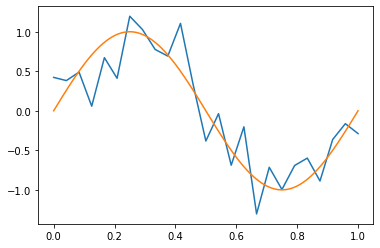

In [292]:
num_datapoints = 25
input_X = np.linspace(0, 1, num_datapoints).reshape(1, -1)
t = np.sin(2 * np.pi * input_X) + np.random.normal(0, 0.3, (1, num_datapoints))

plt.plot(input_X.flatten(), t.flatten())
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)))

$K = \phi\phi^T$

In [293]:
basisfunctions = []

for example in input_X.flatten(): # For now we take use every datapoint to construct kernels
    basisfunctions.append(create_gaussian(example))

phi = []

for x in input_X.flatten():
    phi.append(create_feature_vector(x, basisfunctions).reshape(-1, 1))
    
phi = np.concatenate(phi, axis=1)

K = (phi.T @ phi)

The activation a is given by 

$$
    a = (K + \lambda I_N)^{-1} t
$$

In [294]:
lambda_ = 1 # For now we do not use regularization 
a = np.linalg.inv(K + lambda_ * np.identity(num_datapoints)) @ t.T

Now new classfications can be done using 

$$
y(x) = a^T\boldsymbol{\phi}\phi(x)
$$

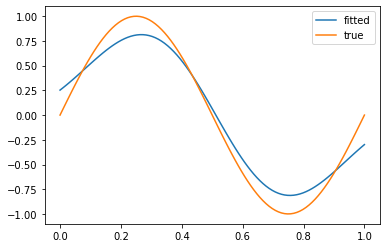

In [295]:
plt.plot(np.linspace(0, 1, 100), [((a.T @ phi) @ create_feature_vector(x, basisfunctions))[0][0] for x in np.linspace(0, 1, 100)], label='fitted')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), label='true')
plt.legend()
plt.show()

The primary thing to take away from this is that we can find a closed-form solution using the innter product of an input vector and the basis functions of the training examples. For this reasons we do not need to find an optimal weight vector $w$